## Label Exploration Tutorial

In this tutorial, we will explore the distributions of the data labels.

In [1]:
import os
import glob
import h5py
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

First, get the path of all of the HDF5 files using glob.

See [README.md](../README.md) for how to download dataset from AWS.

To use data from AWS interactively in Python [install](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html) and use the [AWS Python SDK](https://docs.aws.amazon.com/code-library/latest/ug/python_3_s3_code_examples.html)

In [2]:
# change to location of downloaded dataset
hdf5_dir = "../hdf5_dir"

hdf5_files = glob.glob(os.path.join(hdf5_dir, "*.hdf5"))

Pull label information into a pandas dataframe from HDF5 attributes.

In [3]:
h5_attrs = []

for file in tqdm(hdf5_files):
    with h5py.File(file, "r") as hdf:
        attrs = {}
        attrs["pathology_grade"] = hdf.attrs["pathology_grade"]
        attrs["pathology"] = hdf.attrs["pathology"]
        attrs["tumor_type"] = hdf.attrs["tumor_type"]
        h5_attrs.append(attrs)

h5_attrs_df = pd.DataFrame(h5_attrs)
h5_attrs_df.head(5)

  0%|          | 0/831 [00:00<?, ?it/s]

100%|██████████| 831/831 [00:00<00:00, 2406.00it/s]


,pathology_grade,pathology,tumor_type
0,3.0,clear cell,0.0
1,3.0,clear cell,0.0
2,3.0,clear cell,0.0
3,6.0,"renal cell carcinoma, NOS",0.0
4,1.0,clear cell,0.0


Plot distribution of pathology grades

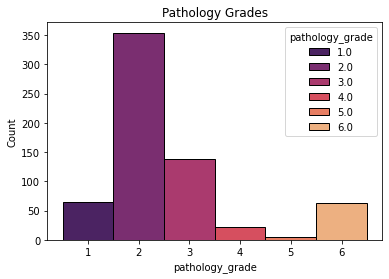

In [4]:
sns.histplot(h5_attrs_df, x="pathology_grade", discrete=True, 
             hue="pathology_grade", palette="flare_r", alpha=1)
plt.title("Pathology Grades")
plt.show()

Plot distribution of tumor types 

For tumor type, 0=RCC, 1=oncocytoma, 2=AML, 3=other

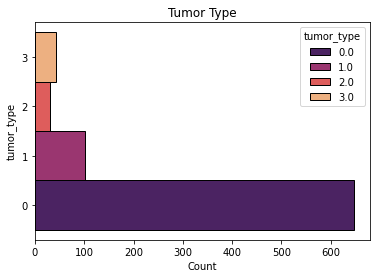

In [5]:
ax = sns.histplot(h5_attrs_df, y="tumor_type", discrete=True, 
             hue="tumor_type", palette="flare_r", alpha=1)
ax.yaxis.get_major_locator().set_params(integer=True)
plt.title("Tumor Type")
plt.show()

For pathologies, first remove any pathologies with less than count of 3.
Then plot distribution of the most common pathologies.

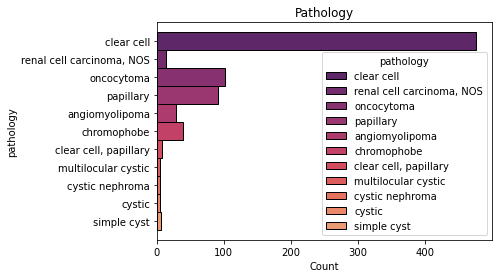

In [6]:
counts = h5_attrs_df["pathology"].value_counts()
h5_attrs_df_mostcommon = h5_attrs_df[h5_attrs_df["pathology"].isin(counts[counts>3].index)]

ax=sns.histplot(h5_attrs_df_mostcommon, y="pathology", discrete=True,
                hue="pathology", palette="flare_r", alpha=1)
plt.title("Pathology")
plt.show()